# Create datasets

In [1]:
import uproot

from hml.approaches import Cut
from hml.datasets import ImageDataset, SetDataset
from hml.generators import Madgraph5
from hml.representations import Image

## Load generated events

In [2]:
sig = Madgraph5.from_output("data/pp2wz@10k", "mg5_aMC")
bkg = Madgraph5.from_output("data/pp2jj@10k", "mg5_aMC")

sig_events = uproot.open(sig.runs[0].events()[0])
bkg_events = uproot.open(bkg.runs[0].events()[0])

## Preselection

In [3]:
preselection = Cut("fatjet.size > 0 and jet.size > 1")
preselection.read(sig_events)
preselection.value

<Array [True, True, True, True, ..., True, False, False] type='10000 * bool'>

## Create a set dataset

In [4]:
cut = "fatjet.size > 0 and jet.size > 1"

set_ds = SetDataset(["fatjet0.mass", "fatjet0.tau21", "jet0,jet1.delta_r"])
set_ds.read(sig_events, 1, [cut])
set_ds.read(bkg_events, 0, [cut])

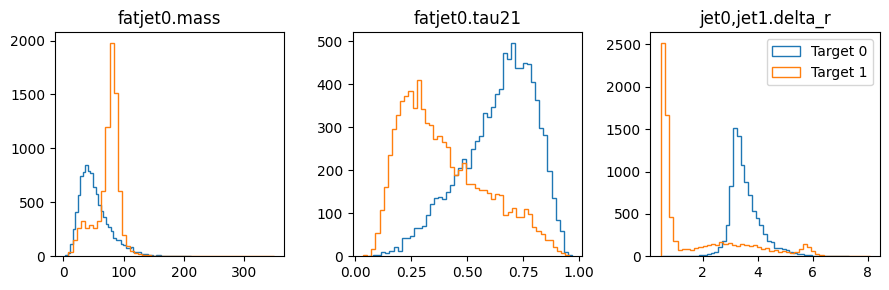

In [5]:
set_ds.show()

In [6]:
set_ds.split(0.7, 0.3, seed=42)
print(set_ds.train.samples.shape)
print(set_ds.train.targets.shape)

(12644, 3)
(12644,)


In [7]:
set_ds.save("data/wjj_vs_qcd_set.ds")

## Create an image dataset

In [8]:
image_ds = ImageDataset(
    Image(
        height="fatjet0.constituents.phi",
        width="fatjet0.constituents.eta",
        channel="fatjet0.constituents.pt",
    )
    .with_subjets("fatjet0.constituents", "kt", 0.3, 0)
    .translate(origin="SubJet0")
    .rotate(axis="SubJet1", orientation=-90)
    .pixelate(size=(33, 33), range=[(-1.6, 1.6), (-1.6, 1.6)])
)

In [9]:
image_ds.read(sig_events, 1, [cut])
image_ds.read(bkg_events, 0, [cut])

#--------------------------------------------------------------------------
#                         FastJet release 3.4.1
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPYING file for details.
#--------------------------------------------------------------------------


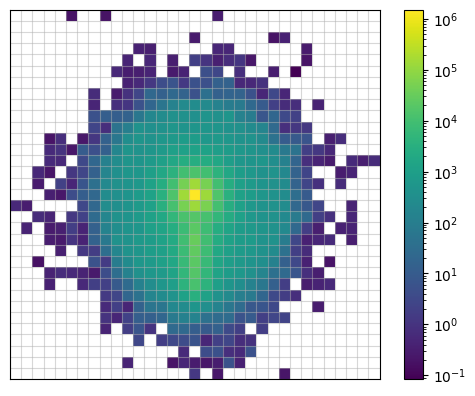

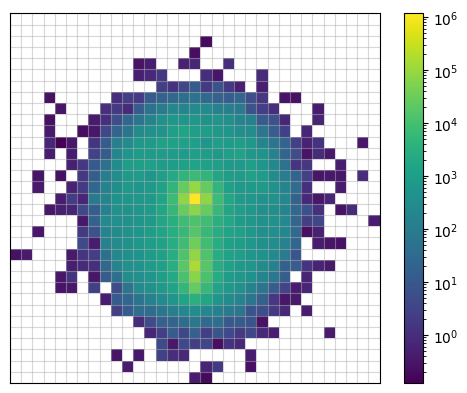

In [10]:
image_ds.show(norm="log", target=0, show_pixels=True)
image_ds.show(norm="log", target=1, show_pixels=True)

In [11]:
image_ds.split(0.7, 0.3, seed=42)
image_ds.save("data/wjj_vs_qcd_image.ds")